<a href="https://colab.research.google.com/github/JAINAM007/StockMarketPrediction/blob/main/Group_2_stock_prediction_module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
# importing data of Adani Power from 2016 to 2021
mainrawdata = pd.read_csv('ADANIPOWER.csv')
rawdata=mainrawdata.copy()
rawdata.head()
abc=[]

# formating date into integer
for i in range(len(rawdata)):
  abc.append(rawdata['Date'][i].split('-'))
  rawdata['Date'][i]=''.join(abc[i])

rawdata.head()
rawdata.tail() 
# droping unwanted colums
data= rawdata.drop(['Adj Close'],axis=1)

# dropping null values
data.dropna(inplace=True)

# dropping close and making the remaining data as independent variables
X=data.drop('Close',axis=1)
y=data['Close']
X.tail(11)


,Date,Open,High,Low,Volume
1222,20210129,49.950001,51.450001,49.500000,5298883.0
1223,20210201,52.000000,52.950001,51.000000,5059097.0
1224,20210202,53.000000,53.849998,51.400002,4066305.0
1225,20210203,52.900002,53.200001,52.200001,3936262.0
1226,20210204,52.700001,54.849998,52.549999,9754786.0
1227,20210205,53.000000,53.900002,52.049999,5894618.0
1228,20210208,52.849998,54.500000,52.599998,4410119.0
1229,20210209,53.349998,53.500000,52.400002,3897198.0
1230,20210210,53.000000,53.099998,52.000000,4263047.0
1231,20210211,52.150002,55.200001,52.099998,9731753.0


# Random Forest


Random forest without time series data tranformation

0.9895046642798361


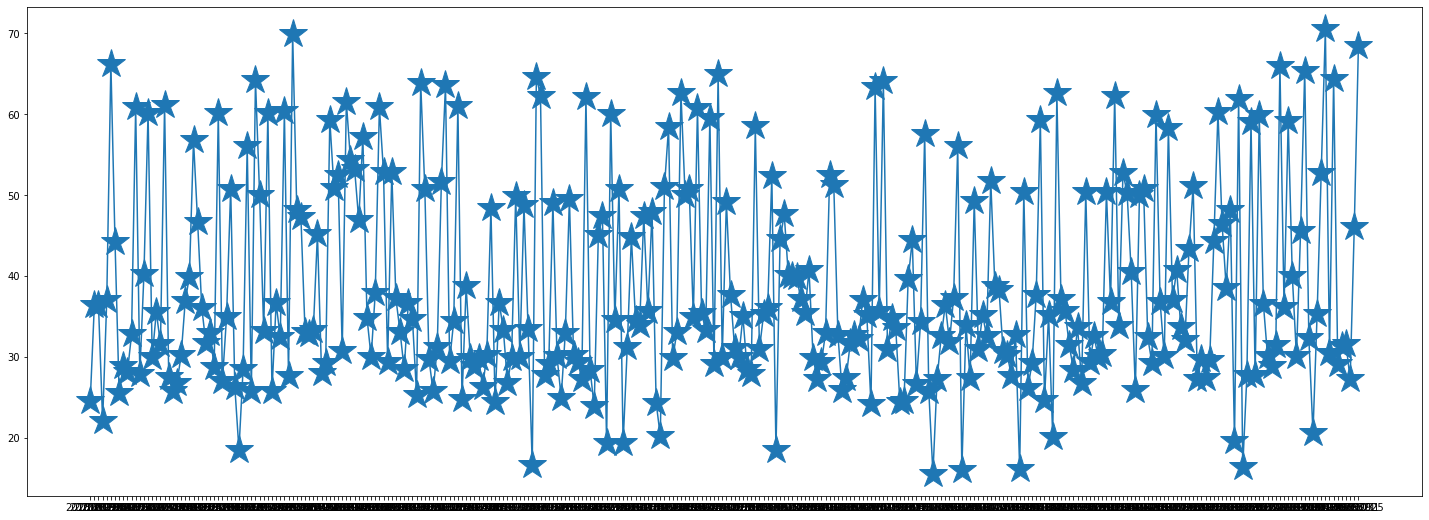

In [ ]:
# random forest without sliding f
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# dataFrame = pd.read_csv("ADANIPOWER.csv")
# dataFrame.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfg = RandomForestRegressor(n_estimators=10)
rfg.fit(np.array(X_train).reshape(-1,1),y_train)
y_pred = rfg.predict(np.array(X_test).reshape(-1,1))

print(rfg.score(np.array(X_test).reshape(-1,1),y_test))

plt.figure(figsize=(25,9))
plt.plot(X_test,y_test,marker="*", markersize=30,label='Close price')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# starting point of time frame
Start_Frame=0
# Ending point of time frame
End_frame=10
data.reset_index()
X=data['Date']
y=data['Close']
yForiteration=data.Close[0:10]

x = 0
# trying to divide the data into the time frame
# taking first 10 indexes(rows) as a independent values and first 10 close values as dependent values
# After that, we are predicting next day close value and moving the frame by one step.
# Hence, from 2 to 11 indexes (rows) as a input and from 2 to 11 close values as output.
while(x<len(X)-11):
  x += 1
  # taking first frame: X and y 
  X_train=np.array(X[Start_Frame:End_frame].astype('int32')).reshape(-1,1)
  # first we were trying to feed the prediction data in a incremental manner
  y_train=np.array(yForiteration[Start_Frame:End_frame])

  # taking next 11th value as a test data
  X_test=np.array(int(X.iloc[End_frame+1])).reshape(-1,1)
  # y_Actual=np.array(yActual.iloc[End_frame+1])
  # y_test=np.array(yForiteration[End_frame+1])

  # incrementing frame
  Start_Frame += 1
  End_frame += 1 

  # initializing model 
  rfg = RandomForestRegressor(n_estimators=10)
  rfg.fit(X_train,y_train)
  
  # predicting result of X_test
  y_pred = rfg.predict(X_test)

  # appending the prediction result into training data
  yForiteration = np.append(yForiteration,y_pred,axis=0)
  # yForiteration.append(y_pred)

array([[20210212]])

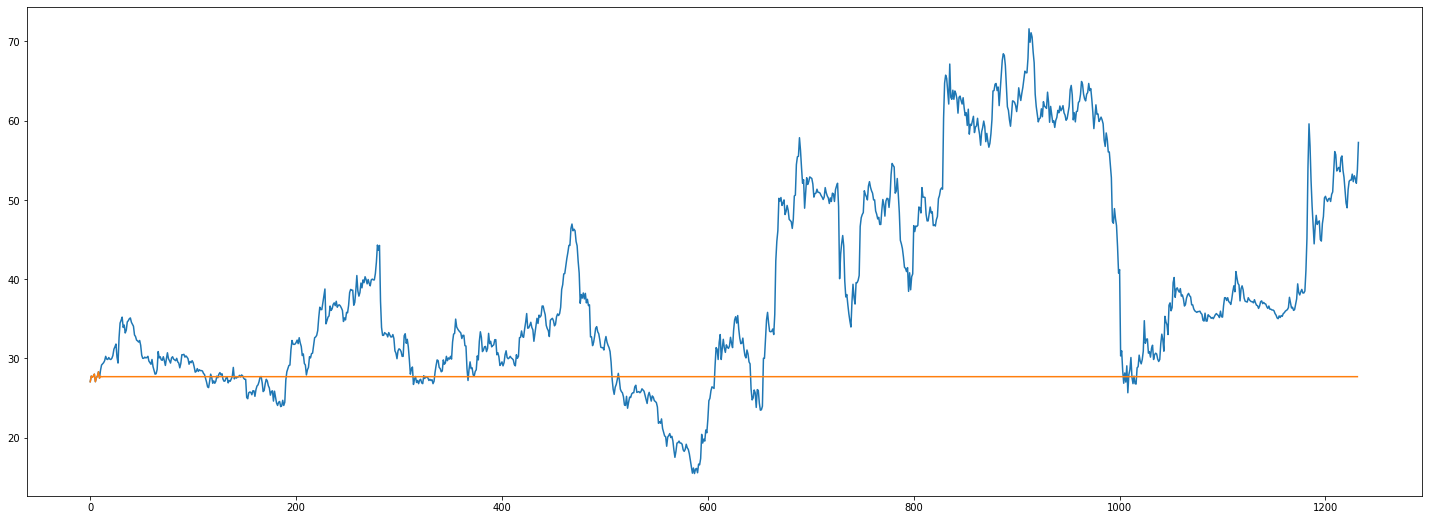

In [ ]:
plt.figure(figsize=(25,9))
# yActual=data['Close']
plt.plot(data.index,data['Close'],marker="", markersize=30,label='Close price')
plt.plot(data.index[0:len(data.index)-1],yForiteration,marker="", markersize=30,label='Close price')
X_test

In this model we are not feeding the predicted data into the training model instead we are taking existing coresponding values with respect to X

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Start_Frame=0
End_frame=10
data.reset_index()
X=data['Date']
y=data['Close']

# ygraph
yForiteration=data.Close[0:10]

x = 0

while(x<len(X)-11):
  x += 1
  X_train=np.array(X[Start_Frame:End_frame].astype('int32')).reshape(-1,1)
  y_train=np.array(y[Start_Frame:End_frame])

  X_test=np.array(int(X.iloc[End_frame+1])).reshape(-1,1)
  
  Start_Frame += 1
  End_frame += 1 

  rfg = RandomForestRegressor(n_estimators=10)
  rfg.fit(X_train,y_train)
  
  y_pred = rfg.predict(X_test) 
  # print("prediction",y_pred)
  # print("Actual Value",y_Actual)
  # print("Date:",X_test,"Differnce",y_Actual-y_pred,y_Actual,y_pred)
  # yForiteration.loc[End_frame+1]=y_pred
  yForiteration = np.append(yForiteration,y_pred,axis=0)
  # yForiteration.append(y_pred)

# rfg.score(X[0:len(X)-1],yForiteration)
y_pred = rfg.predict([[202202120]])
y_pred

array([52.4466659])

array([[20210212]])

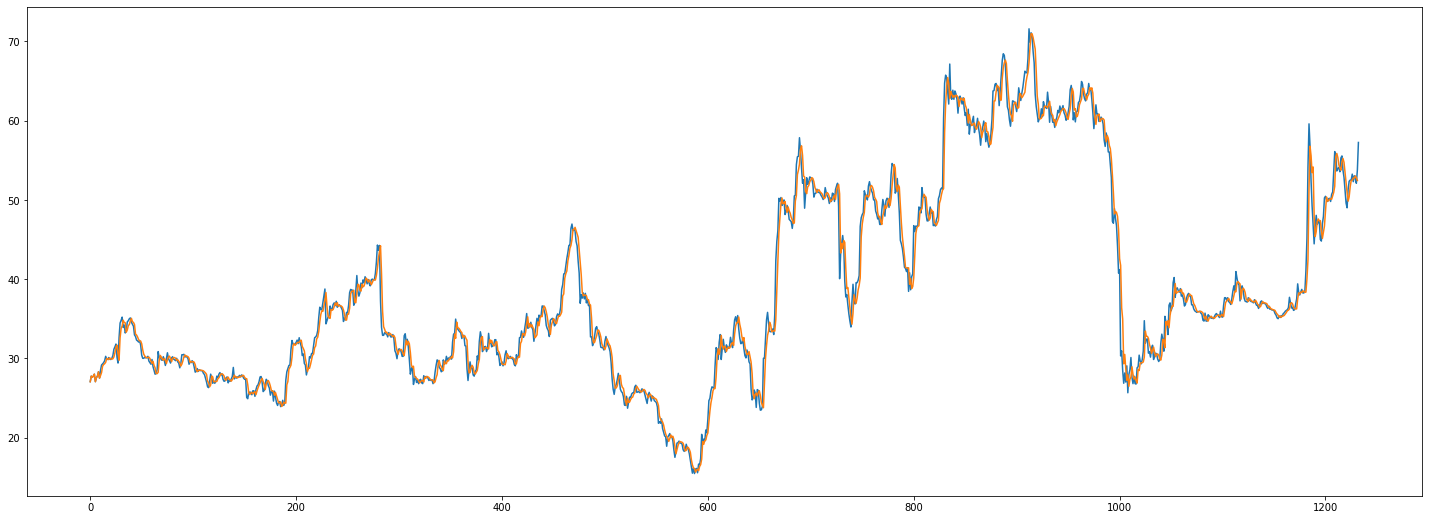

In [ ]:
plt.figure(figsize=(25,9))
# yActual=data['Close']
plt.plot(data.index,data['Close'],marker="", markersize=30,label='Close price')
plt.plot(data.index[0:len(data.index)-1],yForiteration,marker="", markersize=30,label='Close price')
X_test

# Radom forest with data time series transformation using time slider

Adani power Open price prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9848250473324287


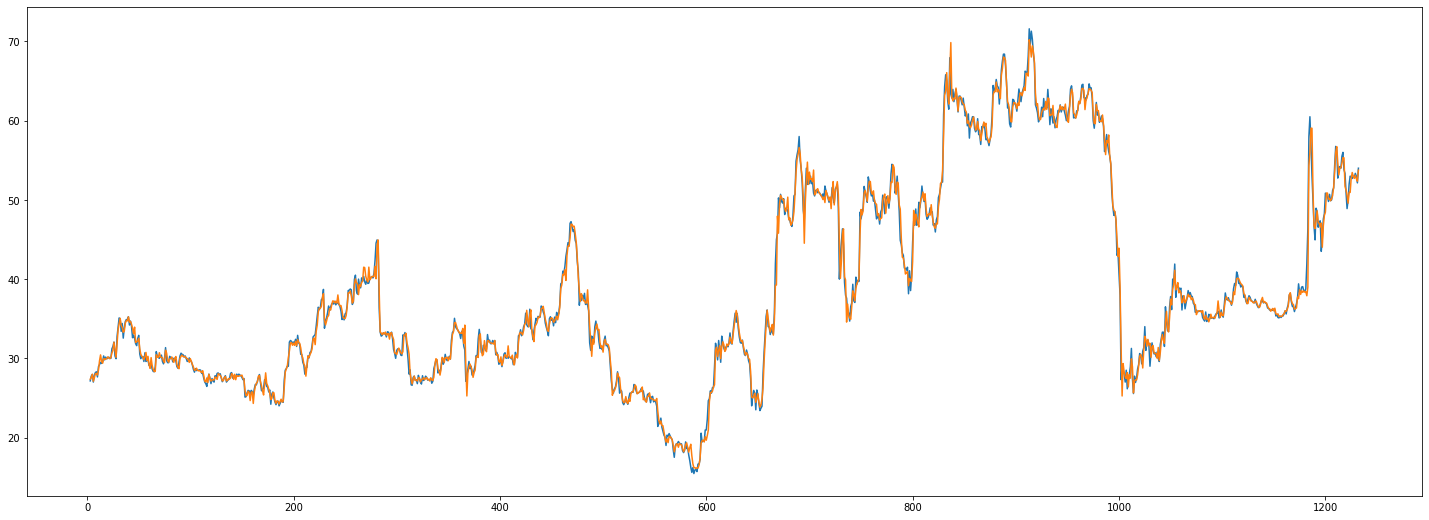

In [ ]:
# importing the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting data and dropping null values from it
rawdata1 = pd.read_csv("ADANIPOWER.csv")
rawdata1.dropna(inplace=True)

# method to set time series data to superwised data
def time_series_data(data, input_steps, output_steps=1):
  # initializing two arrays to save input and output
  X,y = [],[]
  
  # loop to populate two arrays by number of features = input_steps, and number of output = output_steps
  for i in range(input_steps,len(data)):
    if i+output_steps > len(data):
      break;
    X.append(data[i-input_steps: i])
    y.append(data[i:i+output_steps])

  return np.array(X).reshape(-1,input_steps), np.array(y)


# generating data using sliding window
X,y = time_series_data(np.array(rawdata1['Open']),3,1)

# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# initializing random forest
rfg = RandomForestRegressor(n_estimators=100, random_state=0)
# fitting the model
rfg.fit(X_train,y_train)
# predicting the value of whole X
y_predict = rfg.predict(X)
# score 
print(rfg.score(X_test,y_test))

# ploting the graph
plt.figure(figsize=(25,9))
plt.plot(rawdata1.index[3:], y,marker="", markersize=30,label='Open price')
plt.plot(rawdata1.index[3:],y_predict,label='Open price')



Adani power Close price prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.9871147603820526
mean_squared_error :  0.7365133845466753


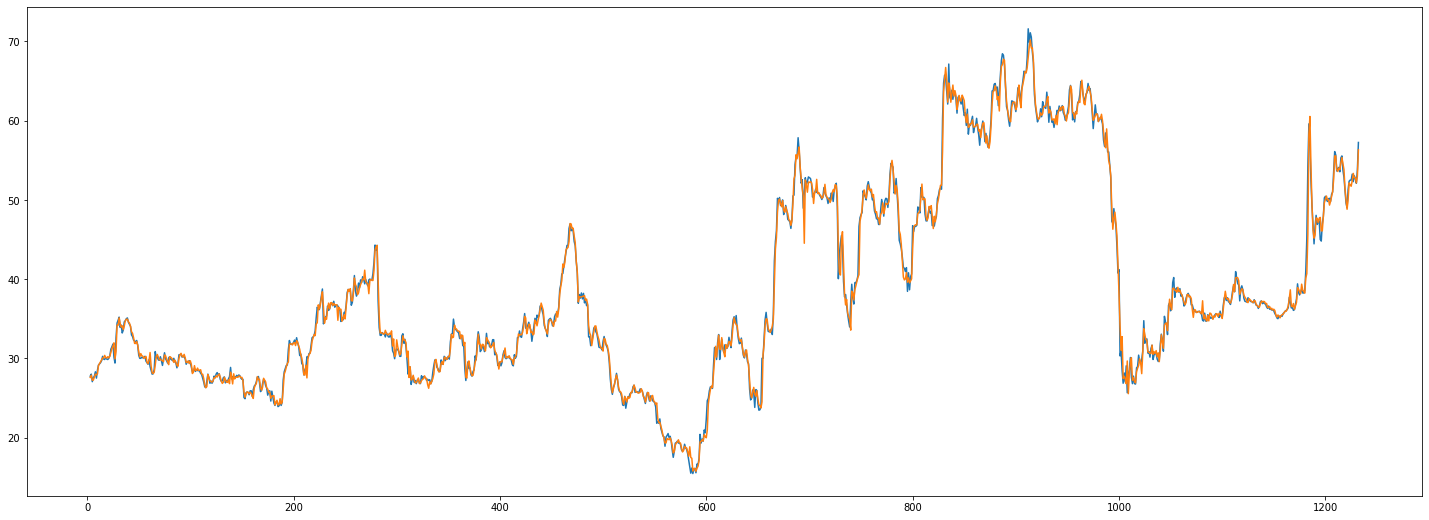

In [ ]:
# importing the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting data and dropping null values from it
rawdata1 = pd.read_csv("ADANIPOWER.csv")
rawdata1.dropna(inplace=True)

# method to set time series data to superwised data
def time_series_data(data, input_steps, output_steps=1):
  # initializing two arrays to save input and output
  X,y = [],[]
  
  # loop to populate two arrays by number of features = input_steps, and number of output = output_steps
  for i in range(input_steps,len(data)):
    if i+output_steps > len(data):
      break;
    X.append(data[i-input_steps: i])
    y.append(data[i:i+output_steps])

  return np.array(X).reshape(-1,input_steps), np.array(y)


# generating data using sliding window
X,y = time_series_data(np.array(rawdata1['Close']),3,1)

# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# initializing random forest
rfg = RandomForestRegressor(n_estimators=100, random_state=0)
# fitting the model
rfg.fit(X_train,y_train)
# predicting the value of whole X
y_predict = rfg.predict(X)
# score 
print(rfg.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y, y_predict)
print("mean_squared_error : ",mse)
# ploting the graph
plt.figure(figsize=(25,9))
plt.plot(rawdata1.index[3:], y,marker="", markersize=30,label='Open price')
plt.plot(rawdata1.index[3:],y_predict,label='Open price')



Adani power Low price prediction


In [ ]:
# importing the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting data and dropping null values from it
rawdata1 = pd.read_csv("ADANIPOWER.csv")
rawdata1.dropna(inplace=True)

# method to set time series data to superwised data
def time_series_data(data, input_steps, output_steps=1):
  # initializing two arrays to save input and output
  X,y = [],[]
  
  # loop to populate two arrays by number of features = input_steps, and number of output = output_steps
  for i in range(input_steps,len(data)):
    if i+output_steps > len(data):
      break;
    X.append(data[i-input_steps: i])
    y.append(data[i:i+output_steps])

  return np.array(X).reshape(-1,input_steps), np.array(y)


# generating data using sliding window
X,y = time_series_data(np.array(rawdata1['Low']),3,1)

# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# initializing random forest
rfg = RandomForestRegressor(n_estimators=100, random_state=0)
# fitting the model
rfg.fit(X_train,y_train)
# predicting the value of whole X
y_predict = rfg.predict(X)
# score 
print(rfg.score(X_test,y_test))

# ploting the graph
plt.figure(figsize=(25,9))
plt.plot(rawdata1.index[3:], y,marker="", markersize=30,label='Open price')
plt.plot(rawdata1.index[3:],y_predict,label='Open price')



Adani power High price prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9870017057572263


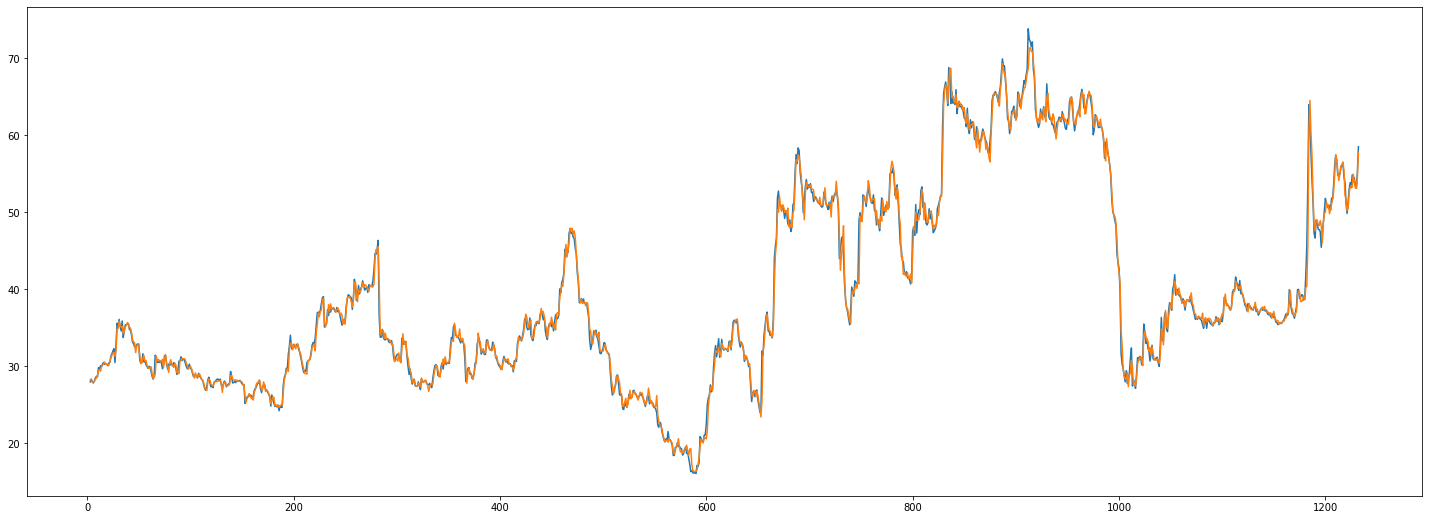

In [ ]:
# importing the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting data and dropping null values from it
rawdata1 = pd.read_csv("ADANIPOWER.csv")
rawdata1.dropna(inplace=True)

# method to set time series data to superwised data
def time_series_data(data, input_steps, output_steps=1):
  # initializing two arrays to save input and output
  X,y = [],[]
  
  # loop to populate two arrays by number of features = input_steps, and number of output = output_steps
  for i in range(input_steps,len(data)):
    if i+output_steps > len(data):
      break;
    X.append(data[i-input_steps: i])
    y.append(data[i:i+output_steps])

  return np.array(X).reshape(-1,input_steps), np.array(y)


# generating data using sliding window
X,y = time_series_data(np.array(rawdata1['High']),3,1)

# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# initializing random forest
rfg = RandomForestRegressor(n_estimators=100, random_state=0)
# fitting the model
rfg.fit(X_train,y_train)
# predicting the value of whole X
y_predict = rfg.predict(X)
# score 
print(rfg.score(X_test,y_test))

# ploting the graph
plt.figure(figsize=(25,9))
plt.plot(rawdata1.index[3:], y,marker="", markersize=30,label='Open price')
plt.plot(rawdata1.index[3:],y_predict,label='Open price')



# Candlestick graph

In [ ]:
import plotly.graph_objects as go
import plotly.express as gol
df=mainrawdata


fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=True)
fig.add_trace(go.Scatter(x=mainrawdata['Date'],y=mainrawdata['Close'],line=dict(color='royalblue', width=0.5)))
fig.update_layout(yaxis_range=[0,90])
fig.show()

# Random Forest


Random forest without time series data tranformation

MLP Regression

In [ ]:
from sklearn.neural_network import MLPRegressor
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing data of Adani Power from 2016 to 2021
mainrawdata = pd.read_csv('ADANIPOWER.csv')
rawdata=mainrawdata.copy()
rawdata.head()
abc=[]

# formating date into integer
for i in range(len(rawdata)):
  abc.append(rawdata['Date'][i].split('-'))
  rawdata['Date'][i]=''.join(abc[i])

rawdata.head()
rawdata.tail() 
# droping unwanted colums
data= rawdata.drop(['Adj Close'],axis=1)

# dropping null values
data.dropna(inplace=True)

# dropping close and making the remaining data as independent variables
X=data.drop('Close',axis=1)
y=data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

mlp = MLPRegressor(learning_rate_init=0.111111)
mlp.fit(X_train,y_train)
X_test
y_pred=mlp.predict(X_test)
# y_pred
k=y_pred-y_test
k
mlp.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-0.9275382576759221

Linear Regression 


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_test)

0.9989196508559305

TimeSeries Solution


In [ ]:
mainrawdata = pd.read_csv('ADANIPOWER.csv',parse_dates=['Date'],index_col="Date")
# type(mainrawdata.Date[0])


In [ ]:
mainrawdata["2017-02"]

Simple Close Plot


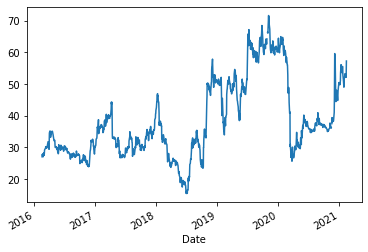

In [ ]:
mainrawdata.Close.plot()

Simple Monthly Close Plot

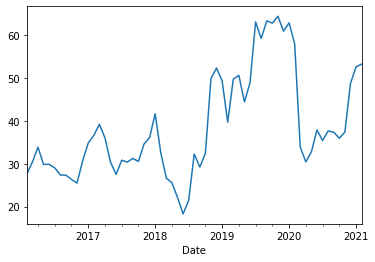

In [ ]:
mainrawdata.Close.resample('M').mean().plot()

Simple Quatrely Close Plot

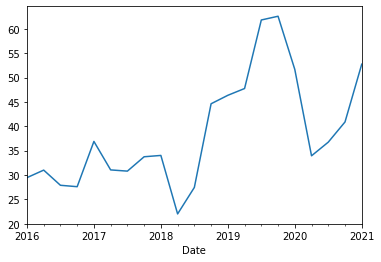

In [ ]:
mainrawdata.Close.resample('Q').mean().plot()

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing data of Adani Power from 2016 to 2021
mainrawdata = pd.read_csv('ADANIPOWER.csv')
rawdata=mainrawdata.copy()
rawdata.dropna(inplace=True)
# rawdata.head()
X=rawdata['Close']
# print(X)
# X2 =
l=len(X) 
l
type(X)
X_First = X[0:len(X)-1]
X_Last = X[1:len(X)]
X_Diff=X_First.to_numpy()-X_Last.to_numpy()
print(X_Diff)
X_Square=X_Diff*X_Diff
X_Square_Sum=np.sum([X_Square])
X_SQroot=np.sqrt(X_Square_Sum)
print("Baseline Error : ",X_SQ)


[-0.700001  0.15     -0.15     ...  0.600003 -1.700001 -3.450001]
Baseline Error :  46.95332736881808
